In [1]:
import os,sys,inspect
currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0,parentdir) 

import soaplite
import soaputils as su
import genBasis
import ase
from ase.visualize import view
from ase.build import bulk
import numpy as np
from numpy.linalg import svd
import matplotlib as matplotlib
import matplotlib.pyplot as p
import numpy.linalg as nl
from scipy.optimize import fmin
import scipy.optimize as op
import time
from random import shuffle
%matplotlib notebook

In [2]:
rCut = 10.0
NradBas = 5
Lmax = 5
myAlphas, myBetas = genBasis.getBasisFunc(rCut, NradBas)

In [ ]:
struct2 = bulk('Cu', 'fcc', a=3.6, cubic=True)
struct2l = soaplite._get_supercell(struct2, rCut=2.0)
#view(struct2)
#view(struct2l)
mat2 = soaplite.get_periodic_soap_structure(struct2, myAlphas, myBetas, rCut, NradBas, Lmax)
mat2l = soaplite.get_periodic_soap_structure(struct2l, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat2)
#p.matshow(mat2l)

In [10]:
a0 = 4.0
c0 = 0.9 * a0 #https://link.springer.com/content/pdf/10.1007/BF03215214.pdf
struct3 = bulk('Au', 'fcc', a=a0, cubic=True)
struct3.set_cell(np.diag((a0,a0,c0)), scale_atoms=True)
struct3.set_chemical_symbols(('Au','Cu','Cu','Au'))
struct3l = soaplite._get_supercell(struct3, rCut=2.0)
#view(struct3)
#view(struct3l)
mat3 = soaplite.get_periodic_soap_structure(struct3, myAlphas, myBetas, rCut, NradBas, Lmax)
mat3l = soaplite.get_periodic_soap_structure(struct3l, myAlphas, myBetas, rCut, NradBas, Lmax)
#p.matshow(mat3)
#p.matshow(mat3l)

<IPython.core.display.Javascript object>


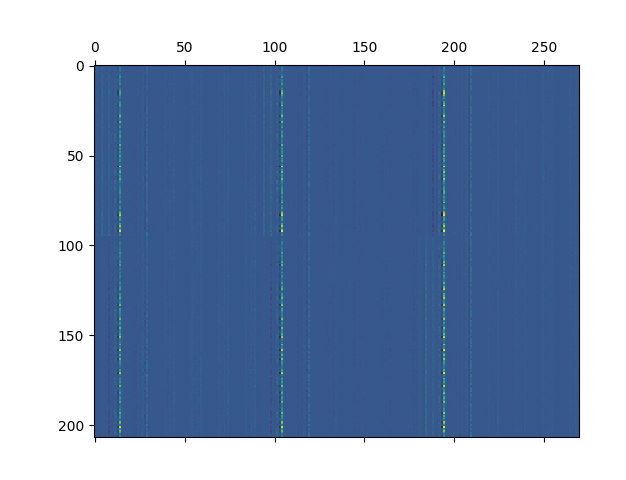

In [4]:
struct4 = ase.io.read(currentdir + "/glass_cube_CuZr.cfg")
struct4r = su.lim_overlap(su.rand_pos(struct4), dmin=1.5) # randomizing positions and limiting overlap
struct4rb = su.lim_overlap(su.rand_pos(struct4), dmin=2)
mat4 = soaplite.get_periodic_soap_structure(struct4, myAlphas, myBetas, rCut, NradBas, Lmax)
mat4r = soaplite.get_periodic_soap_structure(struct4r, myAlphas, myBetas, rCut, NradBas, Lmax)
mat4rb = soaplite.get_periodic_soap_structure(struct4rb, myAlphas, myBetas, rCut, NradBas, Lmax)
p.matshow(mat4)
#p.matshow(mat4r)
#p.matshow(mat4rb)

<IPython.core.display.Javascript object>


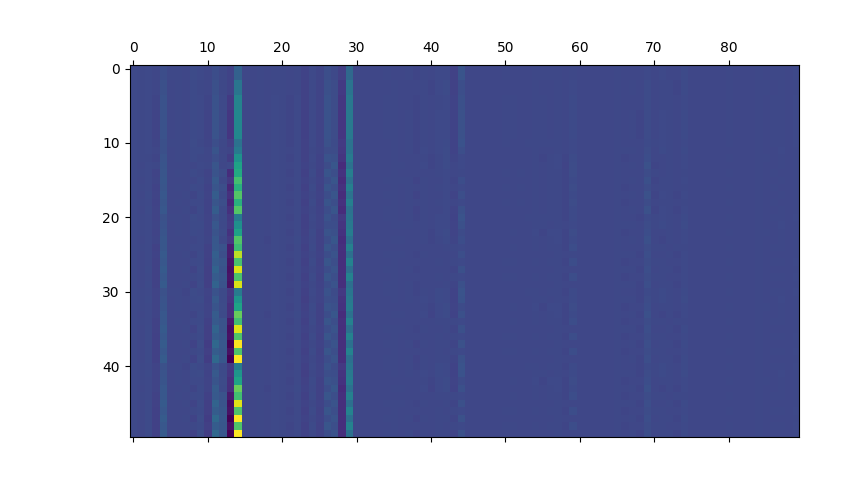

<IPython.core.display.Javascript object>


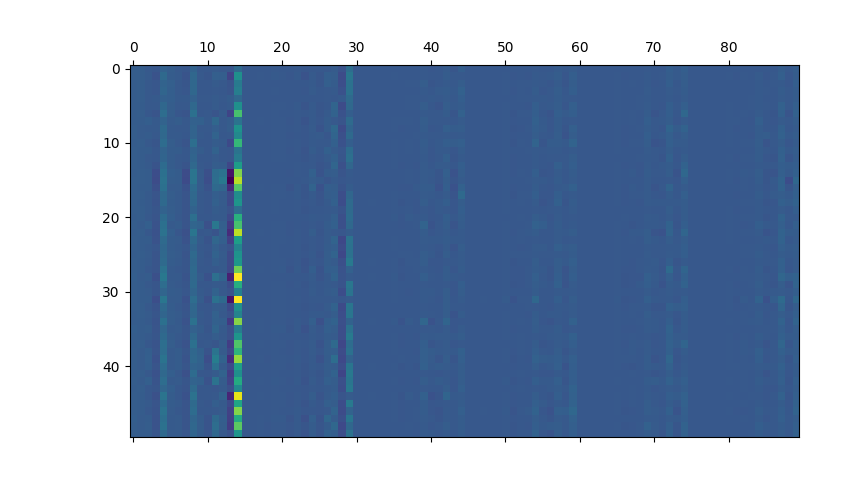

In [12]:
p.matshow(mat3l[0:50,0:90])
p.matshow(mat4[0:50,0:90])

In [ ]:
#randomly assigned symbols fcc 
struct5 = bulk('Au', 'fcc', a=4.0, cubic=True)
struct5.set_chemical_symbols(('Au','Cu','Cu','Au'))
struct5l = soaplite._get_supercell(struct3, rCut=2.0)
symbols5 = struct5l.get_chemical_symbols()
np.random.shuffle(symbols5)
struct5l.set_chemical_symbols(symbols5)
view(struct5l)
mat5 = soaplite.get_periodic_soap_structure(struct5l, myAlphas, myBetas, rCut, NradBas, Lmax)
p.matshow(mat5)

In [ ]:
matdiff = mat5 - mat3l
p.matshow(matdiff)
#print(matdiff[0:100,0:5])

In [ ]:
arr = np.random.rand(200,250)
s = svd(mat2l, full_matrices=False, compute_uv=False)
p.semilogy(s)
print(np.linalg.norm(s))

In [ ]:
#N = 100
#res = np.zeros(N)
#for i in np.arange(N):
    #temp_struct = su.rand_pos(struct2l)
    #temp_mat = soaplite.get_periodic_soap_structure(temp_struct, myAlphas, myBetas, rCut, NradBas, Lmax)
    #s = svd(temp_mat, full_matrices=False, compute_uv=False)
    #res[i] = np.linalg.norm(s)
#print(res)

In [ ]:
atoms_test = struct4.copy()
atoms_test.set_cell(10 * np.identity(3))
atoms_test = su.limit_pos(atoms_test)
x0 = su.rand_pos(atoms_test).get_positions()
t0 = time.time()
N = len(atoms_test.get_positions())*3
print('Number of Atoms: %i' %(N/3))
bounds_obj = [(0,10)]*N
su.show_res(atoms_test, x0, myAlphas, myBetas, rCut=10.0, NradBas=5, Lmax=5, pbc=True)
op_options = {'maxiter': 50000, 'disp': True}
res_obj = op.minimize(su.svd_lp, x0, method='L-BFGS-B',args=(atoms_test, 2, myAlphas, myBetas, rCut, NradBas, Lmax, True),bounds=bounds_obj,  options=op_options)
t1 = time.time()
dt = t1 - t0
print('Time passed: %f s' %dt)
print('Iterations: %i' %res_obj.nit)
xopt = res_obj.x
su.show_res(atoms_test, xopt, myAlphas, myBetas, rCut=10.0, NradBas=5, Lmax=5, pbc=True)

In [ ]:
atoms_test = struct4.copy()
atoms_test.set_cell(10 * np.identity(3))
atoms_test = su.limit_pos(atoms_test)
atoms_test = su.rand_pos(atoms_test)
x0 = atoms_test.get_positions()
mat_test = soaplite.get_soap_structure(atoms_test, myAlphas, myBetas, rCut, NradBas, Lmax)
s = svd(mat_test.transpose(), full_matrices=False, compute_uv=False)
s_test = su.svd_lp(x0, atoms_test, 2, myAlphas, myBetas, rCut, NradBas, Lmax)
print(np.linalg.norm(s))
print(s_test)
print(np.linalg.norm(mat_test))
print(s)

In [ ]:
arr = np.random.rand(200,250)
s = svd(arr.transpose(), full_matrices=False, compute_uv=False)
print(np.linalg.norm(arr))
print(np.linalg.norm(s))